<a href="https://colab.research.google.com/github/FebryanRizki24/uts-machine-learning-ti3f/blob/main/UTS_Febryan%20Rizki%20Hidayatullah_TI3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentasi Gambar dengan Clustering

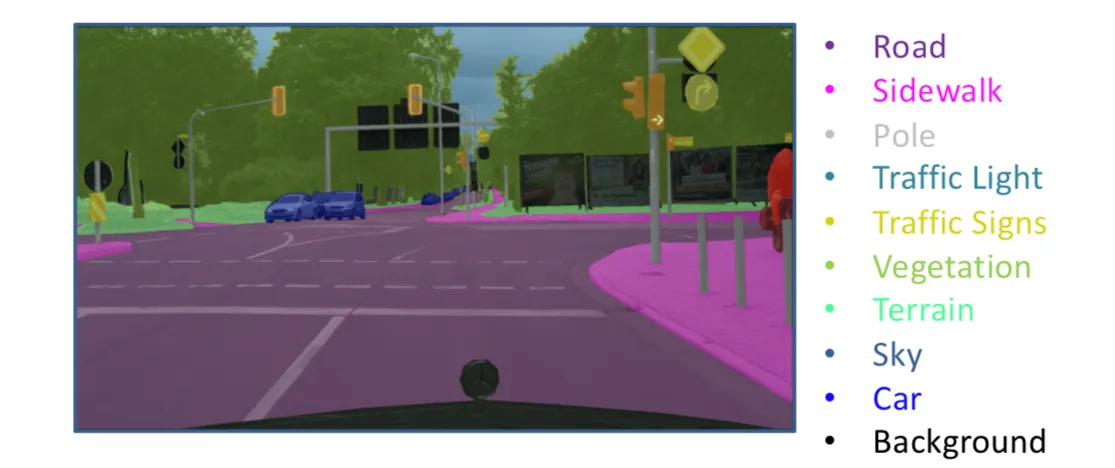

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

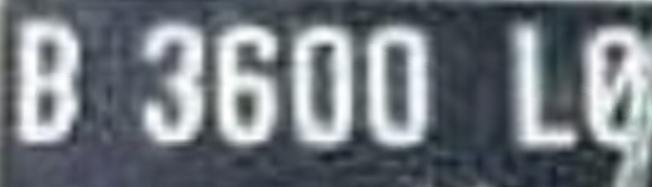

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

## K-Means



persiapkan data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
import os

In [3]:
path = "/content/drive/MyDrive/UTS_ML"
images = []

for image_file in os.listdir(path):
    print(image_file)
    img = cv.imread(os.path.join(path, image_file))
    images.append(img)

BG1985A_png.rf.cb67a6bb3be8b643e9c7d15202c96344.jpg
BM3455A_PNG.rf.f1771f32a53d195647546d4adde981aa.jpg
B3559SU_png.rf.da969620aaf4665b616f8f677a9a6201.jpg
27-E-3524-PAG-09-21_jpeg.rf.e30aee9dd8939945334bd78eabb7501e.jpg
BE2775U_png.rf.1154baadf3d47887a53660553b91c183.jpg


In [4]:
#menggambarkan distribusi piksel dalam citra berdasarkan warna tertentu (Plotting data)
def plot_pixels(data, title, colors=None, N=10000):
  #memeriksa apakah colors ada, jika tidak maka akan diisi dengan data asli
    if colors is None:
        colors = data
    # memilih random subset
    rng = np.random.RandomState(0) #generator nomor acak diinisialisasi dengan 0
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

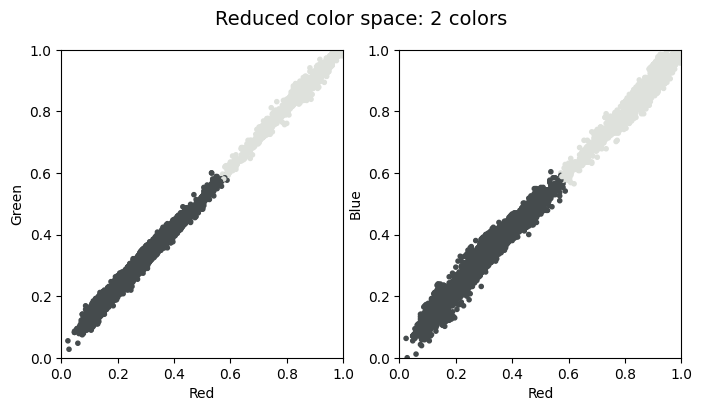

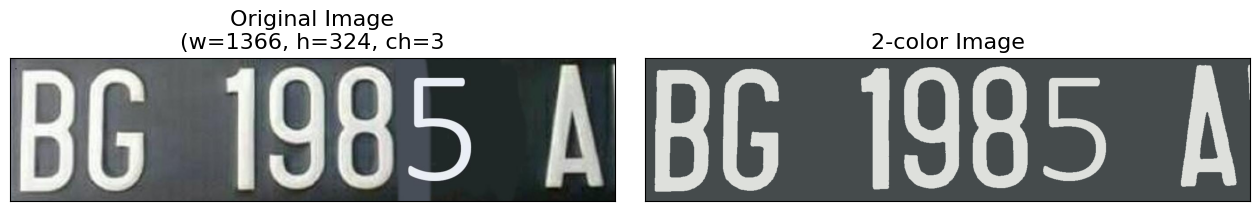

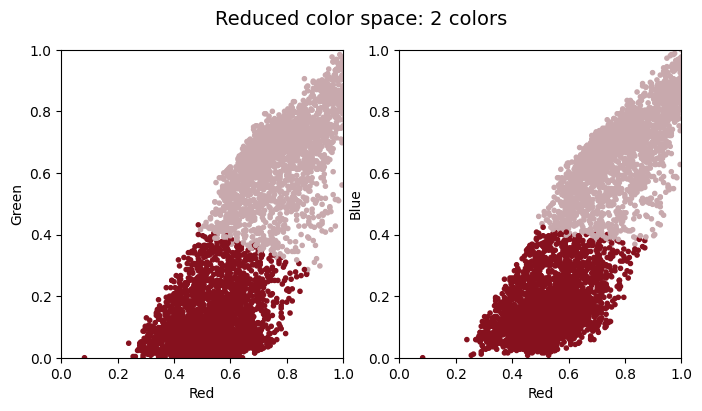

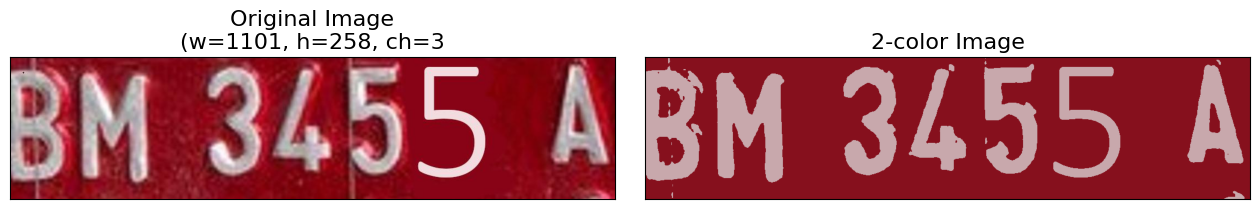

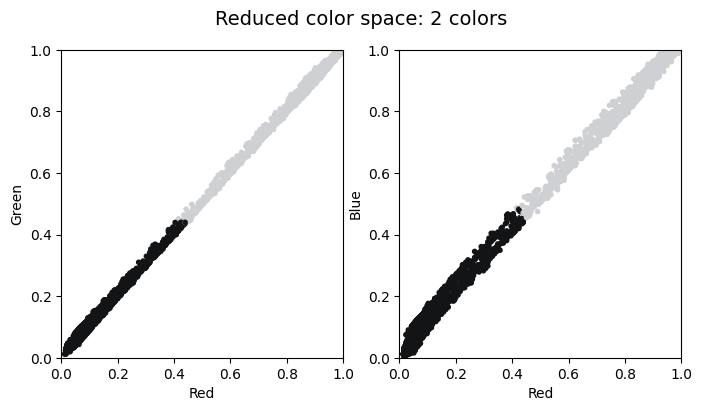

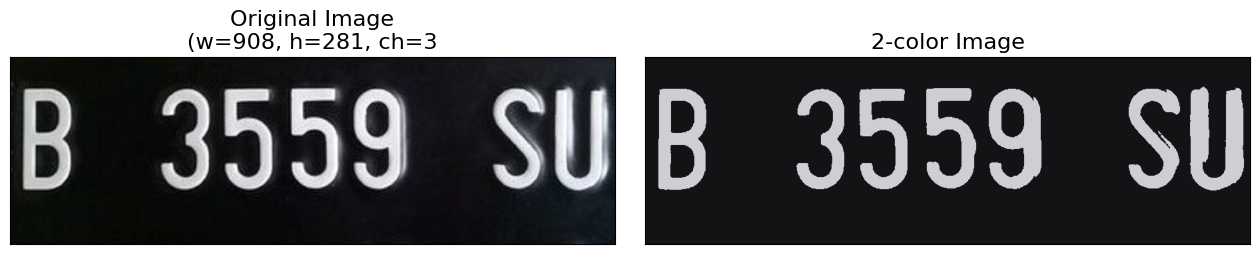

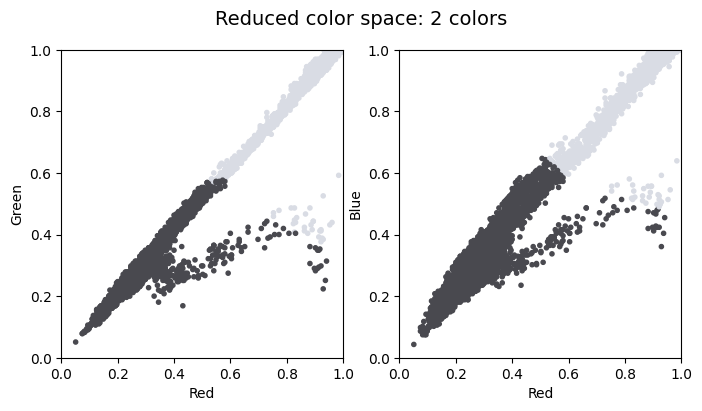

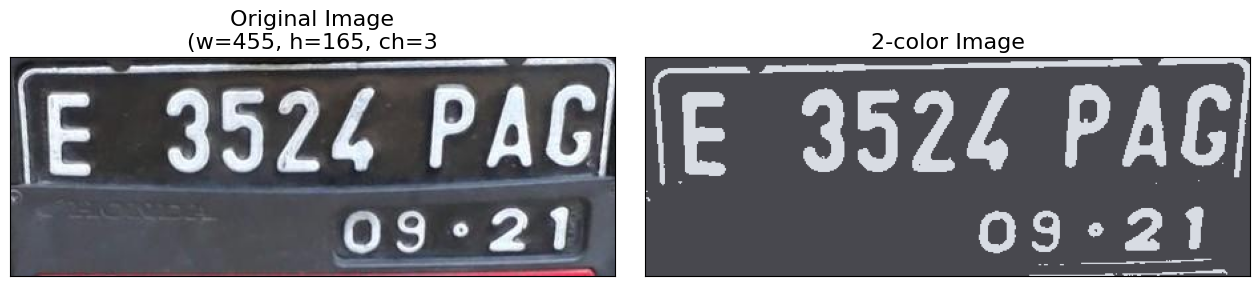

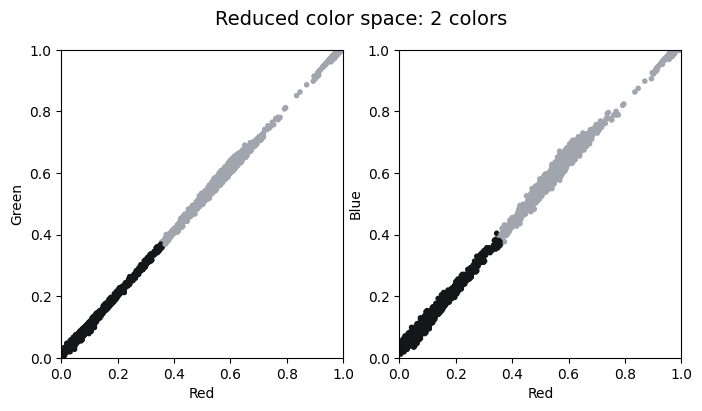

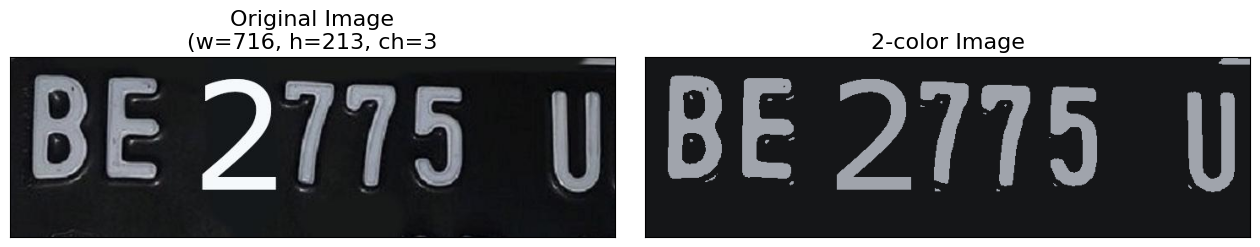

In [5]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues

for img in images:
  h, w, ch= img.shape

  # Normalisasi gambar mengubah nilai piksel antara 0 dan 1
  data = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  data = data / 255.0
  data = data.reshape(h * w, ch)

  kmeans = MiniBatchKMeans(2)
  kmeans.fit(data)
  #representasi warna baru yang telah direduksi warnanaya
  new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

  plot_pixels(data, colors=new_colors,title="Reduced color space: 2 colors")

  img_recolored = new_colors.reshape(img.shape)

  fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                        subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(wspace=0.05)
  ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  ax[0].set_title(f'Original Image\n(w={w}, h={h}, ch={ch}', size=16)
  ax[1].imshow(img_recolored)
  ax[1].set_title('2-color Image', size=16)